# Finance & Analytics Club

Import necessary libraries

In [1]:
import pandas_datareader.data as pdr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm # for linear regression

Download historical data for required stocks

In [2]:
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,datetime.date.today()-datetime.timedelta(364),datetime.date.today())

In [3]:
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-27,201.570007,199.570007,200.289993,199.740005,20899700.0,197.384323
2019-06-28,199.500000,197.050003,198.679993,197.919998,31110600.0,195.585770
2019-07-01,204.490005,200.649994,203.169998,201.550003,27316700.0,199.172989
2019-07-02,203.130005,201.360001,201.410004,202.729996,16935200.0,200.339050
2019-07-03,204.440002,202.690002,203.279999,204.410004,11362000.0,201.999237
...,...,...,...,...,...,...
2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001
2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999


### Function to calculate the slope of n consecutive points on a plot

In [4]:
def slope(ser,n):
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1):
        y = ser[i-n:i]
        x = np.array(range(n))
        y_scaled = (y - y.min())/(y.max() - y.min())
        x_scaled = (x - x.min())/(x.max() - x.min())
        x_scaled = sm.add_constant(x_scaled) # adds a constant in our linear equation to make the slope more visible
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        slopes.append(results.params[-1]) # parameter/cefficient of our linear equation
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes)))) # convert slope to angle
    return np.array(slope_angle)

In [5]:
ohlcv['slope'] = slope(ohlcv['Adj Close'], 5)
ohlcv

,High,Low,Open,Close,Volume,Adj Close,slope
Date,,,,,,,
2019-06-27,201.570007,199.570007,200.289993,199.740005,20899700.0,197.384323,0.000000
2019-06-28,199.500000,197.050003,198.679993,197.919998,31110600.0,195.585770,0.000000
2019-07-01,204.490005,200.649994,203.169998,201.550003,27316700.0,199.172989,0.000000
2019-07-02,203.130005,201.360001,201.410004,202.729996,16935200.0,200.339050,0.000000
2019-07-03,204.440002,202.690002,203.279999,204.410004,11362000.0,201.999237,41.091980
...,...,...,...,...,...,...,...
2020-06-19,356.559998,345.149994,354.640015,349.720001,66119000.0,349.720001,29.980646
2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995,27.108536
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999,41.376957


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c263d1f50>],
      dtype=object)

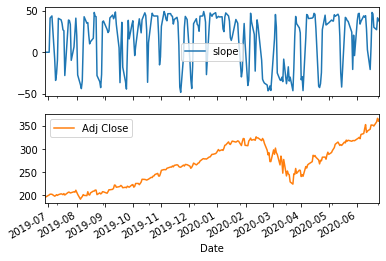

In [6]:
ohlcv.iloc[:,[-1,-2]].plot(subplots = True, layout = (2,1))